In [1]:
import tweepy #tweepy is a python library that can be used to access Twitter API
import pandas as pd #for data manipulation and analysis


In [2]:
import re 
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob

[nltk_data] Downloading package punkt to C:\Users\Accidental
[nltk_data]     G\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Accidental
[nltk_data]     G\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# token is a bearer token provided on twitter developer's portal
token = ''

# for authentication, tweepy client needs a bearer token
client = tweepy.Client(bearer_token = token)

'''
# Defining a query to retrieve data from twitter
# The query retrieves tweets with the phrase Ukraine war or Russia
# The tweets retrieved are written in english
'''
query = '(Ukraine War OR Russia) lang:en -is:retweet has:media entity:India'

start = '2022-04-05T06:00:00Z'

end = '2022-04-05T09:00:00Z'

tweet_fields = ['attachments', 'text', 'author_id', 'conversation_id', 'created_at', 'entities', 'id',
          'in_reply_to_user_id', 'lang', 'possibly_sensitive', 'referenced_tweets', 'reply_settings', 'source']

user_fields = ['id','name', 'username', 'profile_image_url', 'public_metrics']

media_fields = ['media_key', 'type', 'url', 'preview_image_url', 'public_metrics']

expansions = ['author_id', 'attachments.media_keys']

tweets = client.search_recent_tweets(query=query, end_time = end, tweet_fields= tweet_fields, media_fields = media_fields, 
                                     user_fields = user_fields, expansions = expansions, start_time = start, 
                                     max_results = 100)



In [30]:
print(tweets.meta) # checking for errors in the returned response

{'newest_id': '1511266712653553666', 'oldest_id': '1511223769326628868', 'result_count': 56}


In [6]:
for tweet in tweets.data:
    print(tweet.id)
    print("Was tweeted at: " + str(tweet.created_at))
    print(tweet.text)
    print('-' * 20)
    print('\n')

1511266712653553666
Was tweeted at: 2022-04-05 08:57:16+00:00
nuclear submarines and a flotilla to protect the Indian coasts. To avoid escalation US and UK naval task force were forced to leave. Afterwards India would emerge victorious, thanks to Russia's support. https://t.co/VZMHVr7NUD
--------------------


1511266034799501312
Was tweeted at: 2022-04-05 08:54:35+00:00
Hindu Right Wing leader and her supporters attacked and vandalized a mosque in Ghazipur, UP, India!

India under Modi Government is following Hindutva ideology where minorities especially Muslims are attacked quite often.
___
#india #russia #hindutva #modigovt #ranaayub #pakistan https://t.co/WLeMEtTxsj
--------------------


1511263212833947652
Was tweeted at: 2022-04-05 08:43:22+00:00
@JoeBiden
 The goddess of earth want that you will help Pakistan country by financial and weapon wise to go against india.
As this war is necessary to know who is the super most power country group. Whether it's America and Pakistan gro

In [7]:
columns = ['id','attachments', 'text', 'author_id', 'conversation_id', 'created_at', 'entities','in_reply_to_user_id',
           'lang', 'possibly_sensitive', 'referenced_tweets', 'reply_settings', 'source']
data = []
for tweet in tweets.data:
    data.append([tweet.id, tweet.attachments, tweet.text, tweet.author_id, tweet.conversation_id, tweet.created_at,
                 tweet.entities, tweet.in_reply_to_user_id, tweet.lang, tweet.possibly_sensitive, 
                 tweet.referenced_tweets, tweet.reply_settings, tweet.source])
    
df = pd.DataFrame(data, columns = columns)
df.to_csv('tweet_data.csv')

In [8]:
df.head()

,id,attachments,text,author_id,conversation_id,created_at,entities,in_reply_to_user_id,lang,possibly_sensitive,referenced_tweets,reply_settings,source
0,1511266712653553666,{'media_keys': ['3_1511266710052958211']},nuclear submarines and a flotilla to protect t...,1102915193728720897,1511266705409921028,2022-04-05 08:57:16+00:00,"{'annotations': [{'start': 84, 'end': 85, 'pro...",1.102915e+18,en,False,"[(type, id)]",everyone,Twitter for Android
1,1511266034799501312,{'media_keys': ['7_1511265512835198981']},Hindu Right Wing leader and her supporters att...,1510235704298811392,1511266034799501312,2022-04-05 08:54:35+00:00,"{'hashtags': [{'start': 226, 'end': 232, 'tag'...",NaN,en,False,None,everyone,Twitter Web App
2,1511263212833947652,{'media_keys': ['3_1511263210246053888']},@JoeBiden\n The goddess of earth want that you...,1365906922835181569,1511263212833947652,2022-04-05 08:43:22+00:00,"{'mentions': [{'start': 0, 'end': 9, 'username...",9.390910e+05,en,False,None,everyone,Twitter for Android
3,1511262940346961920,{'media_keys': ['3_1511262927042527232']},CRISIS UNSC \nA sudden fall in the production ...,1506545554733830144,1511262940346961920,2022-04-05 08:42:17+00:00,"{'annotations': [{'start': 196, 'end': 197, 'p...",NaN,en,False,None,everyone,Twitter Web App
4,1511261561079406594,{'media_keys': ['3_1511261401494474752']},"China, Russia, India, and the rest of the worl...",308212534,1511261119792488448,2022-04-05 08:36:48+00:00,"{'annotations': [{'start': 0, 'end': 4, 'proba...",3.082125e+08,en,False,"[(type, id)]",everyone,Twitter Web App


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   56 non-null     int64              
 1   attachments          56 non-null     object             
 2   text                 56 non-null     object             
 3   author_id            56 non-null     int64              
 4   conversation_id      56 non-null     int64              
 5   created_at           56 non-null     datetime64[ns, UTC]
 6   entities             56 non-null     object             
 7   in_reply_to_user_id  31 non-null     float64            
 8   lang                 56 non-null     object             
 9   possibly_sensitive   56 non-null     bool               
 10  referenced_tweets    32 non-null     object             
 11  reply_settings       56 non-null     object             
 12  source               56 

In [10]:
print("Attribute\t\tCount")
print('-' * 30)
df.count()

Attribute		Count
------------------------------


id                     56
attachments            56
text                   56
author_id              56
conversation_id        56
created_at             56
entities               56
in_reply_to_user_id    31
lang                   56
possibly_sensitive     56
referenced_tweets      32
reply_settings         56
source                 56
dtype: int64

In [11]:
df.shape

(56, 13)

In [12]:
# Preprocessing
# removing stopwords, punctuations, @mentions, links
def cleanText(text):
  text = text.lower()
  # Removes all mentions (@username) from the tweet since it is of no use to us
  text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    
  # Removes any link in the text
  text = re.sub('http://\S+|https://\S+', '', text)

  # Only considers the part of the string with char between a to z or digits and whitespace characters
  # Basically removes punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Removes stop words that have no use in sentiment analysis 
  text_tokens = word_tokenize(text)
  text = [word for word in text_tokens if not word in stopwords.words()]

  text = ' '.join(text)
  return text

In [13]:
def stem(text):
  # This function is used to stem the given sentence
  porter = PorterStemmer()
  token_words = word_tokenize(text)
  stem_sentence = []
  for word in token_words:
    stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

In [14]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
  if cleaned_text.sentiment.polarity > 0:
    return 'positive'
  elif cleaned_text.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'

In [15]:
def perform_sent(data):
    tweet_data_purified = []
    for tweet in data:
        txt = tweet.text
        clean_txt = cleanText(txt) # Cleans the tweet
        stem_txt = TextBlob(stem(clean_txt)) # Stems the tweet
        sent = sentiment(stem_txt) # Gets the sentiment from the tweet
        tweet_data_purified.append((txt, clean_txt, sent))
        
    return tweet_data_purified

In [16]:
new_dict = perform_sent(tweets.data)
print(new_dict[0])

("nuclear submarines and a flotilla to protect the Indian coasts. To avoid escalation US and UK naval task force were forced to leave. Afterwards India would emerge victorious, thanks to Russia's support. https://t.co/VZMHVr7NUD", 'nuclear submarines flotilla protect indian coasts avoid escalation us uk naval task force forced leave afterwards india would emerge victorious thanks russias support', 'neutral')


In [17]:
type(new_dict)

list

In [18]:
cols = ['original_text', 'cleaned_text', 'classification']
df_sent = pd.DataFrame(new_dict, columns = cols)
df_sent.head()

,original_text,cleaned_text,classification
0,nuclear submarines and a flotilla to protect t...,nuclear submarines flotilla protect indian coa...,neutral
1,Hindu Right Wing leader and her supporters att...,hindu right wing leader supporters attacked va...,positive
2,@JoeBiden\n The goddess of earth want that you...,goddess earth help pakistan country financial ...,positive
3,CRISIS UNSC \nA sudden fall in the production ...,crisis unsc sudden fall production potatoes la...,neutral
4,"China, Russia, India, and the rest of the worl...",china russia india rest world could liberate g...,neutral


In [19]:
ptweets = df_sent[df_sent['classification'] == 'positive']
p_perc = 100 * len(ptweets)/len(df_sent)
ntweets = df_sent[df_sent['classification'] == 'negative']
n_perc = 100 * len(ntweets)/len(df_sent)
print(f'Positive tweets {p_perc} %')
print(f'Neutral tweets {100 - p_perc - n_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 53.57142857142857 %
Neutral tweets 30.357142857142858 %
Negative tweets 16.071428571428573 %


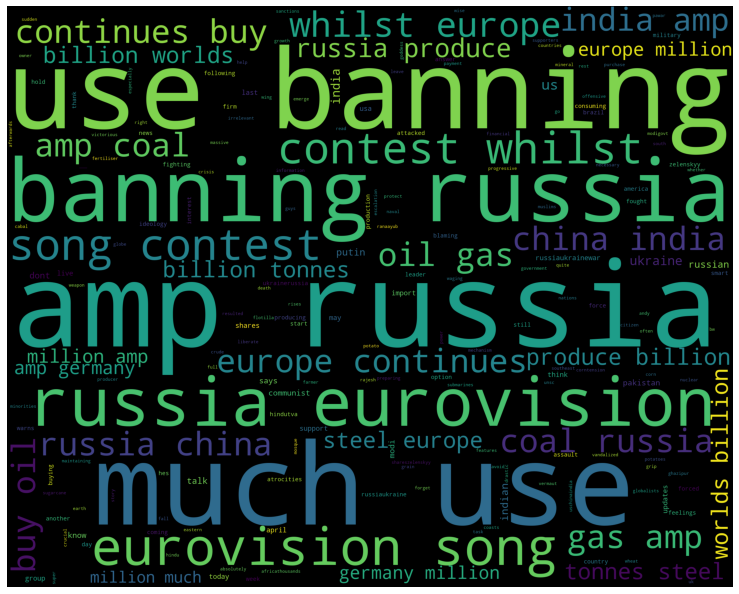

In [20]:
twt = " ".join(df_sent['cleaned_text'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)

plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
# Get users list from the includes object
users = {u["id"]: u for u in tweets.includes['users']}

col_user = ['id','name', 'username', 'profile_image_url', 'public_metrics']
data_user = []
for tweet in tweets.data:
    if users[tweet.author_id]:
        user = users[tweet.author_id]
        # print(user.profile_image_url)
        data_user.append((user.id, user.name, user.username, user.profile_image_url, user.public_metrics))

df_user = pd.DataFrame(data_user, columns = col_user)
df_user.head()

,id,name,username,profile_image_url,public_metrics
0,1102915193728720897,Collei,ColleiLovesU,https://pbs.twimg.com/profile_images/150484073...,"{'followers_count': 7801, 'following_count': 1..."
1,1510235704298811392,Graduate Talks,graduatetalkspk,https://pbs.twimg.com/profile_images/151023602...,"{'followers_count': 3, 'following_count': 26, ..."
2,1365906922835181569,Sexy_hardik_raj,hardik_sexy,https://pbs.twimg.com/profile_images/146348584...,"{'followers_count': 20, 'following_count': 502..."
3,1506545554733830144,KJMUN,KJMUN22,https://pbs.twimg.com/profile_images/150654705...,"{'followers_count': 67, 'following_count': 7, ..."
4,308212534,FalconCrest,TheTheGrinch7,https://pbs.twimg.com/profile_images/137176264...,"{'followers_count': 2461, 'following_count': 4..."


In [22]:
uname = list(df_user['username'])

In [23]:
#freq = {name: df_user.groupby('username').count() for name in uname}
f = {}
for u in uname:
    if u in f:
        f[u] += 1
    else:
        f[u] = 1

print(f)

{'ColleiLovesU': 1, 'graduatetalkspk': 1, 'hardik_sexy': 1, 'KJMUN22': 1, 'TheTheGrinch7': 1, 'PaulJ996': 22, 'vir_mahanta': 1, 'AndyVermaut': 1, 'timesofindia': 2, 'IndiaToday': 2, 'asianlitemedia': 1, 'TheGuardiantz': 1, 'indiacom': 1, 'bears_with': 1, 'farciarz': 1, 'OsbamaBinLaden': 1, 'TheBeingHuman': 1, 'Mishrajihain': 1, 'onelineupdates': 1, 'gppreet': 2, 'Vishals30870391': 1, 'TiwtiwKatua': 1, '_tuhindey': 1, 'kloevfjell': 1, 'raza_arman03': 1, 'vishalgthakkar': 1, 'AmbLindnerIndia': 1, '19Abdirahman': 1, 'Eurocontinent': 1, 'CNNnews18': 1, 'MarieLo10910105': 1, 'johnraila254': 1}


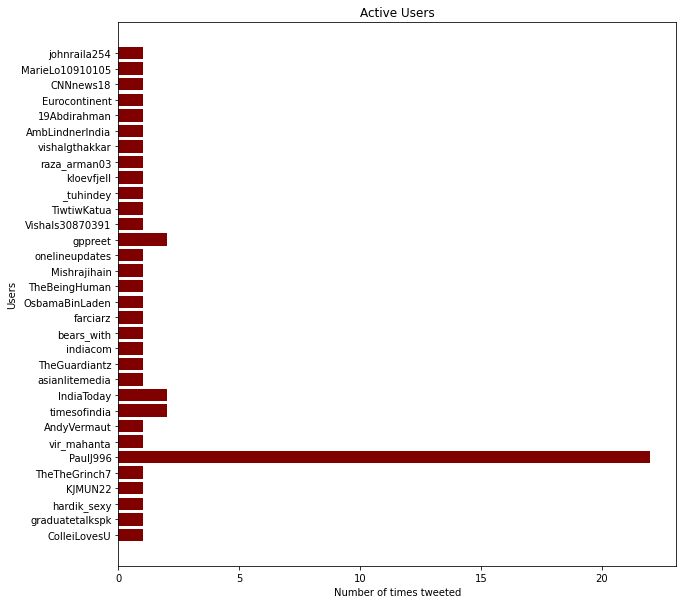

In [24]:
x_data = list(f.keys())
y_data = list(f.values())
fig = plt.figure(figsize = (10, 10))
plt.barh(x_data, y_data, color = 'maroon')
plt.xlabel("Number of times tweeted")
plt.ylabel("Users")
plt.title("Active Users")
plt.show()

In [25]:
gk = df_user.groupby('username')
gk.first()

,id,name,profile_image_url,public_metrics
username,,,,
19Abdirahman,2525534987,ABDIRAHMAN ADAM 🇸🇴,https://pbs.twimg.com/profile_images/150941206...,"{'followers_count': 653, 'following_count': 40..."
AmbLindnerIndia,3466243697,Walter J. Lindner,https://pbs.twimg.com/profile_images/128415422...,"{'followers_count': 49556, 'following_count': ..."
AndyVermaut,283604227,Andy Vermaut,https://pbs.twimg.com/profile_images/135338138...,"{'followers_count': 30784, 'following_count': ..."
CNNnews18,6509832,News18,https://pbs.twimg.com/profile_images/116222900...,"{'followers_count': 4691694, 'following_count'..."
ColleiLovesU,1102915193728720897,Collei,https://pbs.twimg.com/profile_images/150484073...,"{'followers_count': 7801, 'following_count': 1..."
Eurocontinent,796681855378591745,EUROCONTINENT,https://pbs.twimg.com/profile_images/797762240...,"{'followers_count': 824, 'following_count': 10..."
IndiaToday,19897138,IndiaToday,https://pbs.twimg.com/profile_images/139525367...,"{'followers_count': 6017701, 'following_count'..."
KJMUN22,1506545554733830144,KJMUN,https://pbs.twimg.com/profile_images/150654705...,"{'followers_count': 67, 'following_count': 7, ..."
MarieLo10910105,1323342447418740737,Marie London,https://abs.twimg.com/sticky/default_profile_i...,"{'followers_count': 39, 'following_count': 564..."


In [26]:
from datetime import datetime

In [27]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [28]:
print(max(df['created_at']) - min(df['created_at']))

0 days 02:50:38


In [29]:
dt = (df.groupby(pd.Grouper(key = 'created_at', axis = 0, freq = '60min')).count())